In [1]:
import numpy as np
import tensorflow as tf
from keras.layers import Flatten,Activation,Input,Add,Dense,Conv2D,ZeroPadding2D, \
    MaxPooling2D,AveragePooling2D,ZeroPadding2D,BatchNormalization
from keras.models import Model, load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from Resnet50 import ResNet50
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, SGD


In [2]:
train_data_dir = 'train/'
test_data_dir = 'test/'
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [3]:
train_datagen = image.ImageDataGenerator(
    rescale= 1 / 255.0,
    shear_range= 0.2,
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip= True,
    fill_mode= 'nearest',
    width_shift_range= 10,
    height_shift_range= 10,
)
test_datagen = image.ImageDataGenerator(rescale=1/255.0)

In [4]:
train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    color_mode= 'grayscale',
    target_size= (48, 48),
    batch_size= 32,
    class_mode= 'categorical',
    shuffle= True
)

test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer._decayed_lr(tf.float32) # I use ._decayed_lr method instead of .lr
    return lr

In [6]:
schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    2.6808e-04, 898 * 5, 0.8, staircase=False, name=None
)
optimizer = Adam(learning_rate=schedule)
lr_metric = get_lr_metric(optimizer)


In [7]:
loaded_model = load_model('thirty-ep-5894per', custom_objects={'lr': lr_metric}, compile=False)

In [ ]:
#loaded_model.optimizer.learning_rate = 0.0000001
print(loaded_model.optimizer._decayed_lr('float32').numpy())


In [8]:
loaded_model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy', lr_metric])

In [9]:
hist = loaded_model.fit(train_generator, epochs=20)

Epoch 1/20
898/898 [==============================] - 1198s 1s/step - loss: 1.1494 - accuracy: 0.5647 - lr: 2.6218e-04
Epoch 2/20
898/898 [==============================] - 1174s 1s/step - loss: 1.1230 - accuracy: 0.5743 - lr: 2.5074e-04
Epoch 3/20
898/898 [==============================] - 1171s 1s/step - loss: 1.1105 - accuracy: 0.5794 - lr: 2.3979e-04
Epoch 4/20
898/898 [==============================] - 1175s 1s/step - loss: 1.0983 - accuracy: 0.5847 - lr: 2.2933e-04
Epoch 5/20
898/898 [==============================] - 1140s 1s/step - loss: 1.0873 - accuracy: 0.5880 - lr: 2.1932e-04
Epoch 6/20
898/898 [==============================] - 1146s 1s/step - loss: 1.0721 - accuracy: 0.5949 - lr: 2.0974e-04
Epoch 7/20
898/898 [==============================] - 1184s 1s/step - loss: 1.0644 - accuracy: 0.5995 - lr: 2.0059e-04
Epoch 8/20
898/898 [==============================] - 1182s 1s/step - loss: 1.0544 - accuracy: 0.6016 - lr: 1.9183e-04
Epoch 9/20
898/898 [============================

1/1 [==============================] - 0s 32ms/step
(32,)
True: Neutral


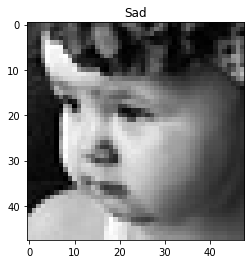

True: Angry


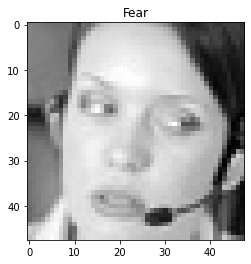

True: Happy


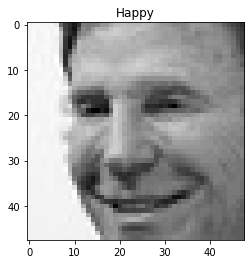

True: Happy


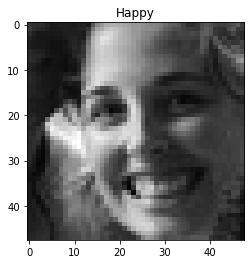

True: Fear


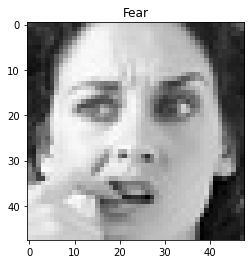

True: Happy


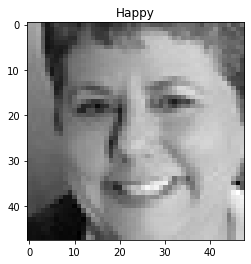

True: Surprise


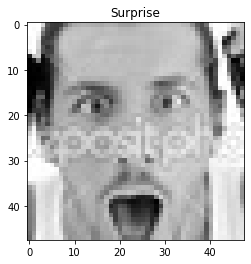

True: Neutral


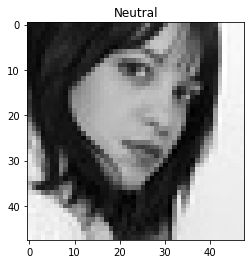

True: Neutral


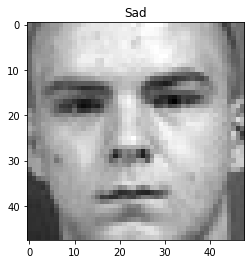

True: Sad


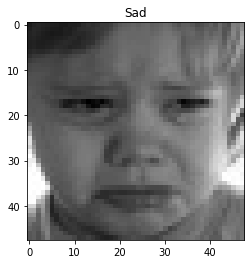

In [13]:
#Predict time!

img, label = test_generator.next()
predictions = loaded_model.predict(img)
predictions = np.argmax(predictions, axis=1)
print(predictions.shape)
test_lbl = np.argmax(label, axis=1)
for i in range(10):
    imagea = img[i]
    true_labl = labels[test_lbl[i]]
    plt.imshow(imagea, cmap='gray')
    plt.title(labels[predictions[i]])
    print(f'True: {true_labl}')
    plt.show()


In [14]:
test_loss, test_acc, lr = loaded_model.evaluate(test_generator, verbose=1) 

print('Test accuracy:', test_acc)

225/225 [==============================] - 96s 413ms/step - loss: 0.9798 - accuracy: 0.6381 - lr: 1.0981e-04
Test accuracy: 0.6380607485771179


In [15]:
hist = loaded_model.save('fifty-ep-6323per', save_format='tf')


INFO:tensorflow:Assets written to: fifty-ep-6323per\assets


INFO:tensorflow:Assets written to: fifty-ep-6323per\assets


In [16]:
loss = hist.history['loss']
# = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs,loss,label='Training loss')
#.plot(epochs, val_loss,'r',label='Validation loss')
plt.plot('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'